# Data Assesment

I am working on writing the data assement section of the manuscript. I need to calculate some counts that I will move into as snakemake file as I go.

In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

In [3]:
# Setup notebook
nbconfig = Nb.setup_notebook()

# Connect to data store
store = pd.HDFStore('../output/sra.h5', mode='r')

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-08-14 
Git hash: 3e6018d790e56d8ccd70647a7eccff8c120a8e6d


In [11]:
all_ids = store['ids'].set_index(['srx', 'srr'])
all_srx = pd.DataFrame(index=all_ids.index.droplevel('srr'))
all_srr = pd.DataFrame(index=all_ids.index.droplevel('srx'))

In [24]:
tech_meta = all_ids.join(store['layout'].to_frame().join(store['strand']))

In [122]:
flags = [
    store['prealn/abi_solid'].assign(flag_abi_solid=True).set_index(['srx', 'srr']),
    store['prealn/alignment_bad'].assign(flag_alignment_bad=True).set_index(['srx', 'srr']),
    store['prealn/download_bad'].assign(flag_download_bad=True).set_index(['srx', 'srr']),
    store['prealn/quality_scores_bad'].assign(flag_quality_scores_bad=True).set_index(['srx', 'srr']),
    store['prealn/queue'].assign(flag_queued=True).set_index(['srx', 'srr']),
    store['prealn/complete'].assign(flag_complete=True).set_index(['srx', 'srr']),
]
flags_df = all_ids.join(pd.concat(flags, axis=1)).fillna(False)

In [123]:
datasets = [
    store['prealn/workflow/bamtools_stats'],
    store['prealn/workflow/samtools_stats'],
    store['prealn/workflow/fastq'],
    store['prealn/workflow/hisat2'],
    store['prealn/workflow/markduplicates'],
]

data = all_ids.join(pd.concat(datasets, axis=1)).shape

In [124]:
f_picard = store['prealn/workflow/collectrnaseqmetrics/first'].drop(['RIBOSOMAL_BASES', 'SAMPLE', 'LIBRARY', 'READ_GROUP'], axis=1)
f_picard.columns = ['f_' + x for x in f_picard.columns]

s_picard = store['prealn/workflow/collectrnaseqmetrics/second'].drop(['RIBOSOMAL_BASES', 'SAMPLE', 'LIBRARY', 'READ_GROUP'], axis=1)
s_picard.columns = ['s_' + x for x in s_picard.columns]

u_picard = store['prealn/workflow/collectrnaseqmetrics/unstranded'].drop(['RIBOSOMAL_BASES', 'SAMPLE', 'LIBRARY', 'READ_GROUP'], axis=1)
u_picard.columns = ['u_' + x for x in u_picard.columns]

genebody = store['prealn/workflow/collectrnaseqmetrics/genebody']
genebody.columns = ['genebody_' + x for x in genebody.columns]

picard = all_ids.join(pd.concat([f_picard, s_picard, u_picard, genebody], axis=1))

In [125]:
screen = store['prealn/workflow/fastq_screen']
screenU = screen.unstack()
screenU.columns = screenU.columns.swaplevel(0, 1)
screenU.sort_index(axis=1, level=0, inplace=True)
screenU.columns = ['_'.join(x) for x in screenU.columns.tolist()]

fq_screen = all_ids.join(screenU)

In [119]:
store.root.aln.workflow

/aln/workflow (Group) ''
  children := ['bamtools_stats' (Group), 'feature_counts' (Group), 'feature_counts_intergenic' (Group), 'hisat2' (Group), 'samtools_stats' (Group)]

In [126]:
flags = [
    store['aln/alignment_bad'].assign(flag_alignment_bad=True).set_index(['srx', 'srr']),
    store['aln/bigwig_bad'].assign(flag_bigwig_bad=True).set_index(['srx', 'srr']),
    store['aln/complete'].assign(flag_complete=True).set_index(['srx', 'srr']),
    store['aln/queue'].assign(flag_queued=True).set_index(['srx', 'srr']),
]
flags2_df = all_ids.join(pd.concat(flags, axis=1)).fillna(False)

In [136]:
datasets = [
    store['aln/workflow/bamtools_stats'],
    store['aln/workflow/samtools_stats'],
]

data2 = all_srx.join(pd.concat(datasets, axis=1, sort=True))

In [137]:
data2

,Both pairs mapped,Duplicates,Failed QC,Forward strand,Mapped reads,Paired-end reads,Percent Duplicates,Percent Failed QC,Percent Forward,Percent Mapped,Percent Paired-end,Percent Reverse,Proper-pairs,Read 1,Read 2,...,total_length,bases_mapped,bases_mapped_(cigar),bases_trimmed,bases_duplicated,mismatches,average_length,maximum_length,average_quality,insert_size_average,insert_size_standard_deviation,inward_oriented_pairs,outward_oriented_pairs,pairs_with_other_orientation,pairs_on_different_chromosomes
DRX000774,NaN,0.0,0.0,1658.0,15284.0,0.0,0.0,0.0,10.847946,100.0,0.0,89.152054,NaN,NaN,NaN,...,4.170450e+05,4.170450e+05,3.705260e+05,0.0,0.0,91.0,27.0,32.0,31.1,0.0,0.0,0.0,0.0,0.0,0.0
DRX000775,NaN,0.0,0.0,1719.0,11333.0,0.0,0.0,0.0,15.168093,100.0,0.0,84.831907,NaN,NaN,NaN,...,3.192910e+05,3.192910e+05,2.859080e+05,0.0,0.0,169.0,28.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
DRX000998,42161042.0,0.0,0.0,22127096.0,44272071.0,44272071.0,0.0,0.0,49.979808,100.0,100.0,50.020192,41373186.0,22139119.0,22132952.0,...,1.462889e+09,1.462889e+09,1.458681e+09,0.0,0.0,4216195.0,33.0,36.0,21.2,172.8,27.6,20692095.0,30118.0,72007.0,278964.0
DRX000999,NaN,0.0,0.0,3158894.0,6311386.0,0.0,0.0,0.0,50.050718,100.0,0.0,49.949282,NaN,NaN,NaN,...,2.058122e+08,2.058122e+08,2.053753e+08,0.0,0.0,409970.0,32.0,35.0,20.9,0.0,0.0,0.0,0.0,0.0,0.0
DRX001000,NaN,0.0,0.0,12431799.0,24865253.0,0.0,0.0,0.0,49.996672,100.0,0.0,50.003328,NaN,NaN,NaN,...,7.977154e+08,7.977154e+08,7.960476e+08,0.0,0.0,1745192.0,32.0,35.0,21.8,0.0,0.0,0.0,0.0,0.0,0.0
DRX001001,NaN,0.0,0.0,9085132.0,18206481.0,0.0,0.0,0.0,49.900538,100.0,0.0,50.099462,NaN,NaN,NaN,...,5.972937e+08,5.972937e+08,5.959562e+08,0.0,0.0,1589532.0,32.0,35.0,21.4,0.0,0.0,0.0,0.0,0.0,0.0
DRX012753,NaN,0.0,0.0,50494871.0,119007057.0,0.0,0.0,0.0,42.430148,100.0,0.0,57.569852,NaN,NaN,NaN,...,1.074378e+10,1.074378e+10,1.068575e+10,0.0,0.0,95720962.0,90.0,101.0,35.6,0.0,0.0,0.0,0.0,0.0,0.0
DRX012754,NaN,0.0,0.0,65283051.0,123753689.0,0.0,0.0,0.0,52.752408,100.0,0.0,47.247592,NaN,NaN,NaN,...,1.095803e+10,1.095803e+10,1.088310e+10,0.0,0.0,42740589.0,88.0,95.0,35.2,0.0,0.0,0.0,0.0,0.0,0.0
DRX012755,NaN,0.0,0.0,47078486.0,115889536.0,0.0,0.0,0.0,40.623587,100.0,0.0,59.376413,NaN,NaN,NaN,...,1.251314e+10,1.251314e+10,1.246144e+10,0.0,0.0,65631799.0,107.0,126.0,35.1,0.0,0.0,0.0,0.0,0.0,0.0
DRX013093,NaN,0.0,0.0,12376.0,30158.0,0.0,0.0,0.0,41.037204,100.0,0.0,58.962796,NaN,NaN,NaN,...,7.858152e+06,7.858152e+06,7.438443e+06,0.0,0.0,53169.0,260.0,552.0,30.9,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
store.root.aln

/aln (Group) ''
  children := ['alignment_bad' (Group), 'bigwig_bad' (Group), 'complete' (Group), 'queue' (Group), 'workflow' (Group)]

In [181]:
prealn_problems = set(store['prealn/abi_solid'].srr.tolist() +  
                      store['prealn/download_bad'].srr.tolist() +  
                      store['prealn/quality_scores_bad'].srr.tolist() + 
                      store['prealn/alignment_bad'].srr.tolist() + 
                      store['prealn/workflow/hisat2'].query('num_reads <= 1000').index.get_level_values('srr').tolist()
                     )

aln_problems = set(store['aln/alignment_bad'].srr.tolist() + 
                   store['aln/bigwig_bad'].srr.tolist()
                  )

problems = prealn_problems.union(aln_problems)

srr_comp = [x for x in store['aln/complete'].srr.unique() if x not in prealn_problems]
srx_comp = store['aln/complete'].query(f'srr == {srr_comp}').srx.unique().tolist()

print(f'{len(srx_comp):,} SRXs and {len(srr_comp):,} SRRs that have completed the entire workflow.')

27,141 SRXs and 34,058 SRRs that have completed the entire workflow.


In [182]:
layout = store['layout'].to_frame().query(f'srr == {srr_comp}').layout
srx_layout = layout.groupby(level='srx').apply(lambda x: '|'.join(set(x.values)))
to_check = ['SE|PE', 'PE|SE', 'keep_R1|PE', 'PE|keep_R1', 'keep_R2|PE', 'PE|keep_R2']
layout_bad = srx_layout.to_frame().query(f'layout == {to_check}').index.tolist()

In [183]:
layout_bad

[]

In [184]:
pe = layout.to_frame().query('layout == "PE"').index.get_level_values('srr').unique().tolist()
r1 = layout.to_frame().query('layout == "keep_R1"').index.get_level_values('srr').unique().tolist()
r2 = layout.to_frame().query('layout == "keep_R2"').index.get_level_values('srr').unique().tolist()
se = layout.to_frame().query('layout == "SE"').index.get_level_values('srr').unique().tolist()

In [185]:
pe_cnts = store['prealn/workflow/fastq'].query(f'srr == {pe}').libsize_R1
pe_cnts.name = 'libsize'
pe_cnts = pe_cnts.to_frame().assign(layout='PE')

r1_cnts = store['prealn/workflow/fastq'].query(f'srr == {r1}').libsize_R1
r1_cnts.name = 'libsize'
r1_cnts = r1_cnts.to_frame().assign(layout='SE')

r2_cnts = store['prealn/workflow/fastq'].query(f'srr == {r2}').libsize_R2
r2_cnts.name = 'libsize'
r2_cnts = r2_cnts.to_frame().assign(layout='SE')

se_cnts = store['prealn/workflow/fastq'].query(f'srr == {se}').libsize_R1
se_cnts.name = 'libsize'
se_cnts = se_cnts.to_frame().assign(layout='SE')

libsize = pd.concat([pe_cnts, se_cnts, r1_cnts, r2_cnts])

In [186]:
libsize.libsize.describe()['mean'],  libsize.libsize.describe()['min'],  libsize.libsize.describe()['max'], 

(13922454.60978331, 1003.0, 297351765.0)

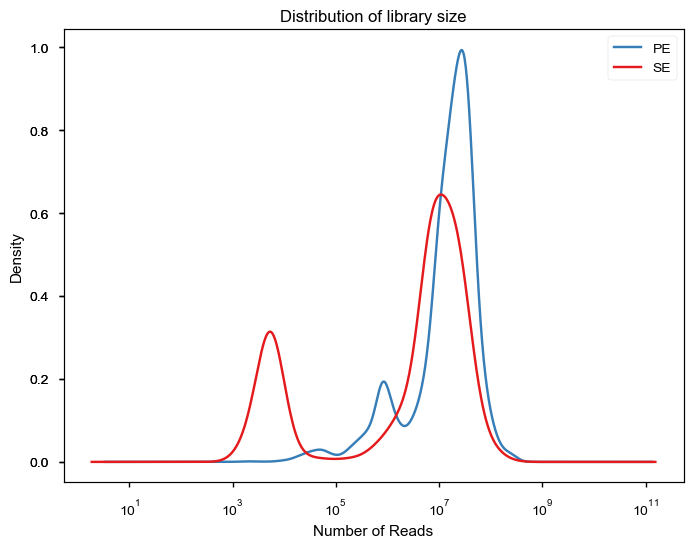

In [190]:
fig, ax = plt.subplots()
ax.set(xscale='log')
ax2 = ax.twiny()

for g, dd in libsize.groupby(by='layout'):
    np.log10(dd.groupby(level='srx').libsize.min()).plot.kde(label=g, ax=ax2)
    
ax.set_xlim(10**np.array(ax2.get_xlim()))
ax2.set_xticklabels([])
ax2.set_xticks([])
ax.set_title('Distribution of library size')
ax.set_xlabel('Number of Reads')
plt.legend()

In [210]:
srx_lookup = store['prealn/workflow/hisat2'].query(f'num_reads > 1_000 and num_reads < 100_000').index.get_level_values('srx').unique().tolist()

In [220]:
df = pd.DataFrame(list(ncbi.aggregate([
    {
        '$match': {
            '_id': {'$in': srx_lookup}
        }
    },
    {
        '$project': {
            '_id': 0,
            'srx': '$srx',
            'srp': '$sra.study.study_id',
        }
    }
])))

In [245]:
def plot(libsize, ax, title):
    for g, dd in libsize.groupby(by='layout'):
        np.log10(dd.groupby(level='srx').libsize.min()).plot.kde(label=g, ax=ax)
    ax.set_title(title)

In [246]:
df.srp.unique().shape

(25,)

1
80
2
1
2
10
1
1
3
3
2
1
1
91
1
498
4
21
2
7
8
4158
2
3
1


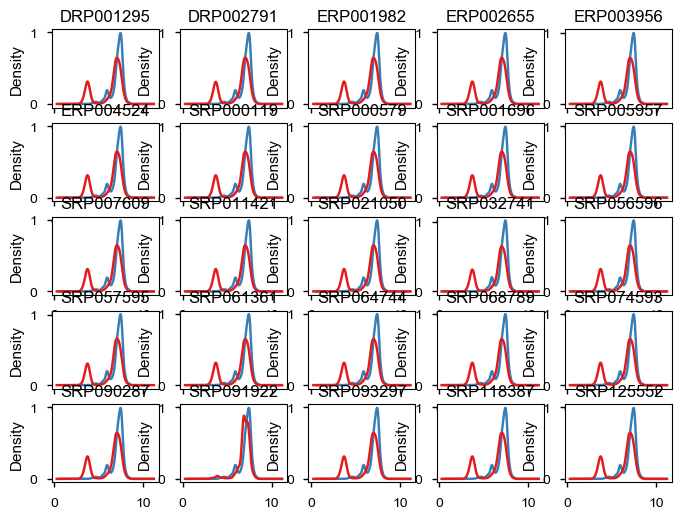

In [247]:
fig, axes = plt.subplots(5, 5)

for (g0, dd0), ax in zip(df.groupby('srp'), axes.flatten()):
    skip = dd0.srx.tolist()
    print(len(skip))
    libsize2 = libsize.query(f'srx != {skip}')
    plot(libsize2, ax, g0)

In [248]:
ncbi.find_one({'sra.study.study_id': 'SRP091922'})

{'_id': 'SRX2262716',
 '_cls': 'Ncbi',
 'sra': {'submission': {'submission_id': 'SRA486165',
   'external_id': [],
   'secondary_id': [],
   'submitter_id': [],
   'uuid': []},
  'organization': {'organization_type': 'center',
   'abbreviation': 'BDGP',
   'name': 'Berkeley Drosophila Genome Project'},
  'study': {'study_id': 'SRP091922',
   'BioProject': 'PRJNA349744',
   'external_id': [],
   'secondary_id': [],
   'submitter_id': [],
   'uuid': [],
   'title': 'D. melanogaster FlyBi interactome',
   'study_type': 'Other',
   'abstract': "These ORF sequences were generated by the FlyBi project for large-scale mapping of binary interactions in Drosophila. FlyBi is a collaboration among the Berkeley Drosophila Genome Project (S. Celniker), Center for Cancer Systems Biology (M. Vidal), and Drosophila RNAi Screening Center (N. Perrimon). The project was funded by an NIGMS grant to N. Perrimon, Harvard Medical School, Boston, MA 02115. The ORF was sequenced as a pool using the Illumina Hi